In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00704.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00562.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00237.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00406.png
/kaggle/input/a-large-sca

In [12]:
import tensorflow as tf
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import random


In [13]:
BASE_DIR = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(BASE_DIR)]
classes.remove('license.txt')
classes.remove('README.txt')
classes.remove('Segmentation_example_script.m')

print(classes)

['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']


In [14]:
image_shape = (250 , 250, 3)
image_paths = []
image_classes = np.array([[clas]*1000 for clas in classes]).reshape(-1)

for clas in classes:
    image_paths.extend([os.path.join(BASE_DIR, clas,clas, i) for i in os.listdir(os.path.join(BASE_DIR, clas,clas))])
    
data = pd.DataFrame({'path':image_paths, 'class':image_classes})
print(data.head())

                                                path            class
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


In [15]:
x_train, x_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)
x_train, x_valid = train_test_split(x_train, test_size=0.2, shuffle=True, random_state=1)


In [16]:


train_generator = ImageDataGenerator(
      rescale = 1./255,
      horizontal_flip=True,
      vertical_flip=True,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')


# Test Generator
test_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_images = train_generator.flow_from_dataframe(
    dataframe=x_train,
    x_col='path',
    y_col='class',
    target_size=(250, 250),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

validation_images = train_generator.flow_from_dataframe(
    dataframe=x_valid,
    x_col='path',
    y_col='class',
    target_size=(250, 250),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=x_test,
    x_col='path',
    y_col='class',
    target_size=(250, 250),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 53824)            

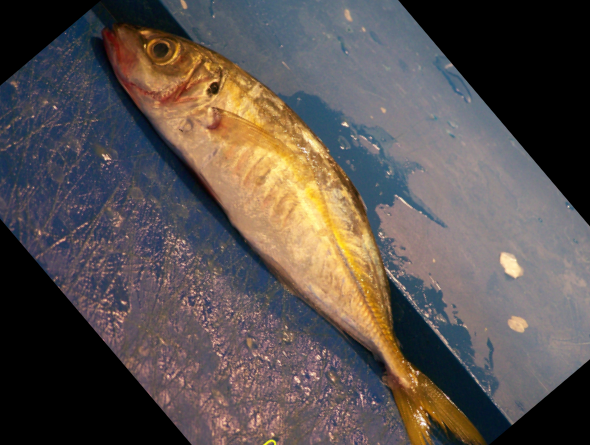

In [19]:
load_img(random.choice(data.path))

Epoch 1/20
180/180 [==============================] - 346s 2s/step - loss: 2.0150 - acc: 0.2720 - val_loss: 1.6375 - val_acc: 0.3806
Epoch 2/20
180/180 [==============================] - 343s 2s/step - loss: 1.2394 - acc: 0.5302 - val_loss: 0.8887 - val_acc: 0.6722
Epoch 3/20
180/180 [==============================] - 343s 2s/step - loss: 0.8203 - acc: 0.6929 - val_loss: 0.5507 - val_acc: 0.7882
Epoch 4/20
180/180 [==============================] - 341s 2s/step - loss: 0.6066 - acc: 0.7671 - val_loss: 0.4446 - val_acc: 0.8326
Epoch 5/20
180/180 [==============================] - 342s 2s/step - loss: 0.5038 - acc: 0.8140 - val_loss: 0.5304 - val_acc: 0.8069
Epoch 6/20
180/180 [==============================] - 341s 2s/step - loss: 0.4062 - acc: 0.8525 - val_loss: 0.3519 - val_acc: 0.8708
Epoch 7/20
180/180 [==============================] - 341s 2s/step - loss: 0.4200 - acc: 0.8464 - val_loss: 0.2854 - val_acc: 0.9000
Epoch 8/20
180/180 [==============================] - 341s 2s/step - 

[0.04330097883939743, 0.9877777695655823]

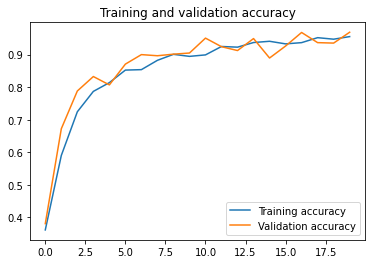

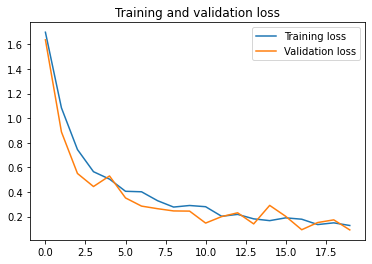

<Figure size 432x288 with 0 Axes>

In [20]:
history = model.fit(train_images,batch_size=32,validation_data=validation_images,epochs=20,verbose=1)


acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 


plt.plot(epochs, acc, label='Training accuracy')
plt.legend()
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.legend()
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.legend()
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()
plt.title ('Training and validation loss')
plt.figure()

model.evaluate(test_images)

In [21]:
model.save('nine_fishes.h5') 